In [22]:
import pandas as pd
from pandas import ExcelWriter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
def import_excel(filepath):
    file='D:/NSN/data1/'+filepath+'.xlsx'
    ipdata=pd.read_excel(file)
    return ipdata

In [24]:
def input_parameter(par_filepath):
    newdata=import_excel(par_filepath)
    ip_para=newdata.columns
    return ip_para

In [25]:
def data_align(data1,imp_para): 
    
    j=0
    l=0
    i=0
    newdata=import_excel('parameters_important_row')
    for i in range(data1.index.size-1):
        if(j==data1.index.size):
            break
        temp_sfc=data1.values[j][11]
        newdata=newdata.append({'SFC':data1.values[j][11]},ignore_index=True)
        while(data1.values[j][11]==temp_sfc ):
            if(data1.values[j][5] in imp_para):
                newdata.loc[l][data1.values[j][5]]=data1.values[j][7]
            j+=1
            i=j
            if(j==data1.index.size):
                break
        l+=1
    newdata=newdata.set_index('SFC')
    c=newdata.columns[newdata.dtypes.eq(object)]
    newdata[c]=newdata[c].apply(pd.to_numeric,errors='coerce',axis=1)
        
    return newdata

In [26]:
def export_excel(finaldf,filename):
    writer=ExcelWriter('D:/NSN/data1/'+filename+'.xlsx')
    finaldf.to_excel(writer,'Sheet1')
    writer.save()
    

In [27]:
def heat_map(cordata,imagename):
    # Generate a mask for the upper triangle
    mask = np.zeros_like(cordata, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f1, ax = plt.subplots(figsize=(21, 12))
    

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(5,250, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(cordata, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    f1.savefig('D:/NSN/data1/'+imagename+'.png')

In [28]:
def plot_cordata(cordat):
    cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

    def magnify():
        return [dict(selector="th",
                     props=[("font-size", "7pt")]),
                dict(selector="td",
                     props=[('padding', "0em 0em")]),
                dict(selector="th:hover",
                     props=[("font-size", "12pt")]),
                dict(selector="tr:hover td:hover",
                     props=[('max-width', '200px'),
                            ('font-size', '18pt')])]

    cor_data_fail.style.background_gradient(cmap, axis=1)\
        .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
        .set_caption("Hover to magify")\
        .set_precision(2)\
        .set_table_styles(magnify())
    

In [29]:
data=import_excel('AHFIB PA Raw data rampup build')

In [30]:
imp_para=input_parameter('parameters_important_row')

In [31]:
fail_data=data[data.Overall_Status=='FAIL']
pass_data=data[data.Overall_Status=='PASS']

In [32]:
dat_fail=data_align(fail_data,imp_para)
cor_data_fail=dat_fail.corr()

In [34]:
dat_pass=data_align(pass_data,imp_para)
cor_data_pass=dat_pass.corr()

In [35]:
export_excel(cor_data_pass,'pass_cordata_FINAL')

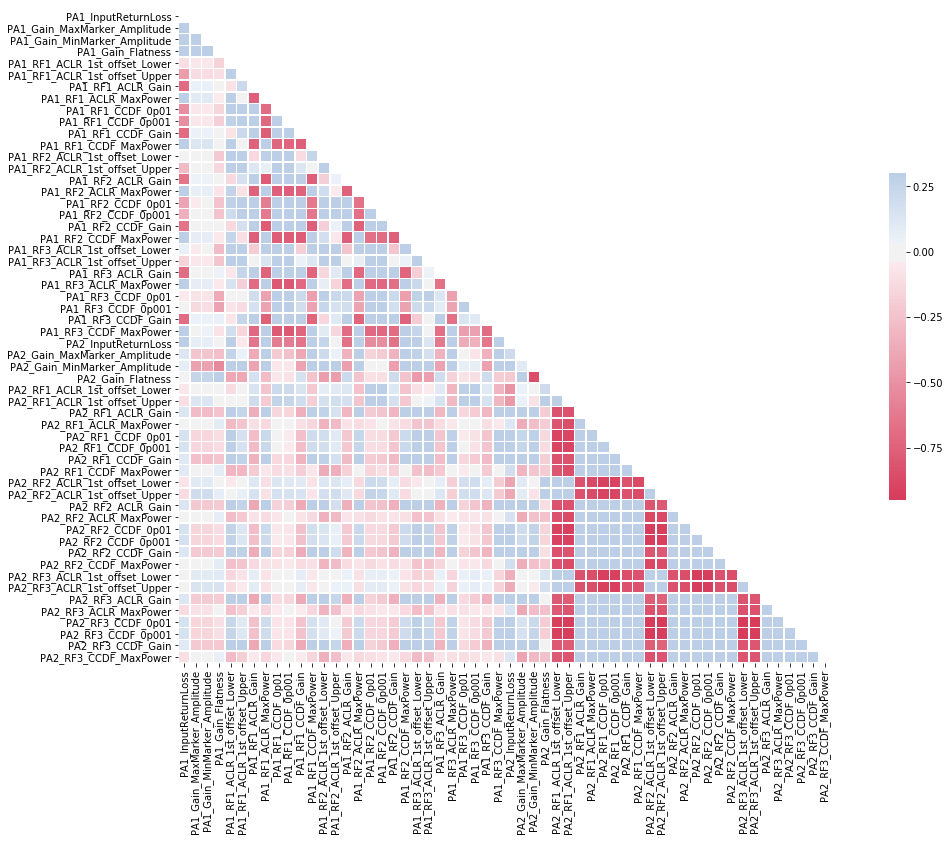

In [39]:
heat_map(cor_data_fail,'image_fail_cor')


In [36]:
export_excel(cor_data_fail,'fail_cordata_FINAL')

In [38]:
export_excel(dat_pass,'datamatrix_PASS_FINAL')
export_excel(dat_fail,'datamatrix_FAIL_FINAL')

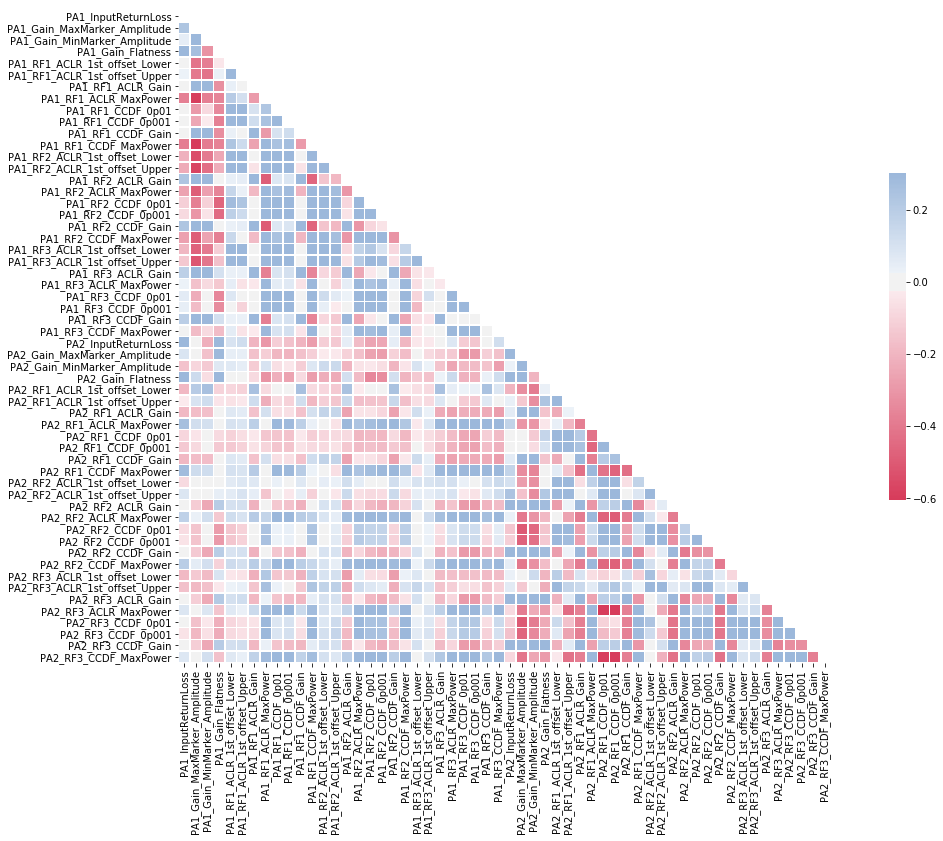

In [40]:
heat_map(cor_data_pass,'image_pass_cor')